In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = np.genfromtxt("/content/gdrive/MyDrive/nndata.csv", delimiter=',')
giris = dataset[:,:7]
cikis = dataset[:,-1] #veri setinden giris cikis dizilerini olusturduk

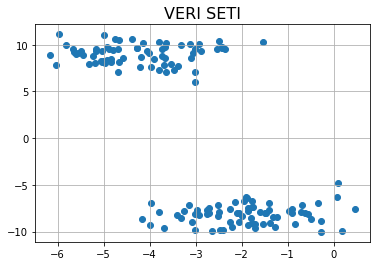

In [ ]:
plt.title('VERI SETI', fontsize=16)
plt.scatter(giris[:,0], giris[:,1])
plt.grid() 
plt.show() #veri setinin grafigi

In [ ]:
ogrenme_orani = 0.1 #her hatada tahmin edilen degerin degisecegi oran
iter_sayisi = 10 #kac kez bastan ogrenecegi

w = np.zeros(1 + giris.shape[1]) #omega degerlerimizin ilk hali
hatalar = [] #hata sayimizi tutacagimiz degisken
for _ in range(iter_sayisi):
  hata = 0
  for xi, hedef in zip(giris, cikis):
    hesap = np.dot(xi, w[1:]) + w[0] #f = w1*x1 + w2*x2 + b fonksiyonu
    tahmin = np.where(hesap >= 0.0, 1, 0) #fonksiyon sonucu 0 dan kucuk ise 0 buyuk ise 1
    degisim = ogrenme_orani * (hedef - tahmin) #eger yanlis ise ogrenme orani * hata kadar degisim
    w[1:] += degisim * xi
    w[0] += degisim
    hata += int(degisim != 0.0) #eger yanlissa hatayi arttir
  hatalar.append(hata)

In [ ]:
hatalar #her iterasyonda hata sayilari

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
w #omega degerlerimiz

array([ 0.        ,  0.02928489, -1.74904287, -0.8350657 , -0.19055413,
        1.08716641,  0.6546075 ,  0.2262323 ])

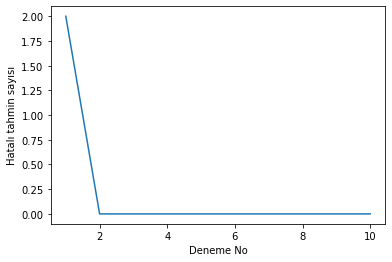

In [ ]:
plt.plot(range(1, len(hatalar) + 1), hatalar)
plt.xlabel('Deneme No')
plt.ylabel('Hatalı tahmin sayısı')
plt.show() #hata sayilari grafigi

In [ ]:
np.where(-2.3607238576457528 * w[1] + 9.518346596580436 * w[2] + 1.8483606179808003 * w[3] + 9.62115643470663 * w[4] + -8.37008940851254 * w[5] + 1.6157250616275787 * w[6] + 7.208178980641894 * w[7] + w[0] >= 0.0, 1, 0) #ornek deneme

array(0)

In [ ]:
np.dot(w[1:], [-2.3607238576457528,9.518346596580436,1.8483606179808003,9.62115643470663,8.37008940851254,1.6157250616275787,7.208178980641894]) + w[0] #ornek deneme 0 dan kucuk oldugu icin 0 sonucu

-8.305914668538845